# **Data Analysis Project: Air Quality from Stations in China**
- **Name:** Amira Ghina Nurfansepta
- **Email:** amiraghina03@gmail.com
- **Dicoding ID:** amiragn

## **Dataset**
1. **No**: Data sequence number. This may be an index or sequential number of the measurement.

2. **year**: The year when the measurement was taken.

3. **month**: The month when the measurement was taken.

4. **day**: The day when the measurement was taken.

5. **hour**: The hour when the measurement was taken.

6. **PM2.5**: Concentration of particulate matter with a diameter of 2.5 micrometers or smaller in the air. It is a crucial indicator of air pollution and can impact human health if the levels are high.

7. **PM10**: Concentration of particulate matter with a diameter of 10 micrometers or smaller in the air. Like PM2.5, it is also an indicator of air pollution that can affect human health.

8. **SO2**: Concentration of sulfur dioxide in the air. SO2 is a toxic gas produced from the combustion of fossil fuels and can cause health problems and environmental pollution.

9. **NO2**: Concentration of nitrogen dioxide in the air. NO2 is a toxic gas produced from human activities such as transportation and industry, and can cause respiratory problems and air pollution.

10. **CO**: Concentration of carbon monoxide in the air. CO is a toxic gas produced from incomplete combustion of fossil fuels and can cause poisoning if inhaled in high amounts.

11. **O3**: Concentration of ozone in the air. Ozone in the upper atmosphere is protective for the earth, but ozone at ground level is a pollutant that can cause respiratory irritation and other health issues.

12. **TEMP**: Air temperature in degrees Celsius.

13. **PRES**: Air pressure in hPa (hectopascal).

14. **DEWP**: Dew point in degrees Celsius. The dew point is the temperature at which the air is saturated with water vapor, causing water vapor to begin condensing into dew or water droplets.

15. **RAIN**: Amount of rainfall in mm (millimeters).

16. **wd**: Wind direction. It indicates the direction from which the wind is blowing.

17. **WSPM**: Wind speed in m/s (meters per second).

18. **station**: Name of the measurement station. All of the stations are in China

These features contain valuable information about air quality and weather conditions at specific locations at different times.

## **Defining the Business Questions**

- What is the pattern of change in air pollution and weather at various stations from year to year?
- What is the relationship between weather conditions (temperature, air pressure, humidity, rain, wind direction and speed) and air pollution levels?
- How do the locations associated with air monitoring stations affect the level of air pollution (PM2.5) in that area?

## **Import All Packages/Library Usedn**
Library is used for data analysis and visualization process.

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")

### **Gathering Data**
Gathering data is the initial stage in the information gathering process, where data is collected from various sources such as databases, files, the web, or through surveys.

**Import from Google Drive** <br>
This is done to further facilitate the analysis process so as not to import the dataset repeatedly.

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Data from Changping Station**

In [167]:
changping_df = pd.read_csv('/content/drive/MyDrive/Data/Proyek Analisis Data/PRSA_Data_Changping_20130301-20170228.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Import Data from Dongsi Station**

In [168]:
dongsi_df = pd.read_csv('/content/drive/MyDrive/Data/Proyek Analisis Data/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Import Data from Gucheng Station**

In [169]:
gucheng_df = pd.read_csv('/content/drive/MyDrive/Data/Proyek Analisis Data/PRSA_Data_Gucheng_20130301-20170228.csv')
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Import Data from Shunyi Station**

In [170]:
shunyi_df = pd.read_csv('/content/drive/MyDrive/Data/Proyek Analisis Data/PRSA_Data_Shunyi_20130301-20170228.csv')
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Import Data from Tiantan Station**

In [171]:
tiantan_df = pd.read_csv('/content/drive/MyDrive/Data/Proyek Analisis Data/PRSA_Data_Tiantan_20130301-20170228.csv')
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


I used only 5 of the 12 stations so that the analysis process would not take too long due to the large number. I chose them randomly.

### **Assessing Data**
Assessing data is the process of examining, analyzing, and understanding the quality and characteristics of the dataset that has been collected.

**Assessing changping_df**

In [172]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [173]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [174]:
print("Number of duplications:", changping_df.duplicated().sum())

Number of duplications: 0


In [175]:
changping_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


**Assessing Data dongsi_df**

In [176]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [177]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [178]:
print("Number of duplications:", dongsi_df.duplicated().sum())

Number of duplications: 0


In [179]:
dongsi_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,NaN,1.280368,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Assessing Data gucheng_df**

In [180]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [181]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [182]:
print("Number of duplications:", gucheng_df.duplicated().sum())

Number of duplications: 0


In [183]:
gucheng_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,34905,35022.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,NaN,1.151064,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


**Assessing Data shunyi_df**

In [184]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [185]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [186]:
print("Number of duplications:", shunyi_df.duplicated().sum())

Number of duplications: 0


In [187]:
shunyi_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,34581,35020.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4540,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,NaN,1.807533,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,NaN,1.287817,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


**Assessing Data tiantan_df**

In [188]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [189]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [190]:
print("Number of duplications:", tiantan_df.duplicated().sum())

Number of duplications: 0


In [191]:
tiantan_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,NaN,1.280368,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


- There is no duplication of data in each data
- The data type in each column is appropriate
- There are no inacurate values in each data
- There are many missing values in each data so imputation must be done.

### **Cleaning Data**
Data cleaning is the process of identifying, correcting, and removing problems or discrepancies in the dataset to ensure that the data is consistent, accurate, and ready to be used for analysis.

**Handling missing values** <br>
Missing values will be handled by mean for numeric data (integer and float) and by mode for categorical data (object).

**Handling changping_df**

In [192]:
changping_df['PM2.5'].fillna(changping_df['PM2.5'].mean(), inplace=True)
changping_df['PM10'].fillna(changping_df['PM10'].mean(), inplace=True)
changping_df['SO2'].fillna(changping_df['SO2'].mean(), inplace=True)
changping_df['NO2'].fillna(changping_df['NO2'].mean(), inplace=True)
changping_df['CO'].fillna(changping_df['CO'].mean(), inplace=True)
changping_df['O3'].fillna(changping_df['O3'].mean(), inplace=True)
changping_df['TEMP'].fillna(changping_df['TEMP'].mean(), inplace=True)
changping_df['PRES'].fillna(changping_df['PRES'].mean(), inplace=True)
changping_df['DEWP'].fillna(changping_df['DEWP'].mean(), inplace=True)
changping_df['RAIN'].fillna(changping_df['RAIN'].mean(), inplace=True)
changping_df['wd'].fillna(changping_df['wd'].mode()[0], inplace=True)
changping_df['WSPM'].fillna(changping_df['WSPM'].mean(), inplace=True)
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Handling dongsi_df**

In [193]:
dongsi_df['PM2.5'].fillna(dongsi_df['PM2.5'].mean(), inplace=True)
dongsi_df['PM10'].fillna(dongsi_df['PM10'].mean(), inplace=True)
dongsi_df['SO2'].fillna(dongsi_df['SO2'].mean(), inplace=True)
dongsi_df['NO2'].fillna(dongsi_df['NO2'].mean(), inplace=True)
dongsi_df['CO'].fillna(dongsi_df['CO'].mean(), inplace=True)
dongsi_df['O3'].fillna(dongsi_df['O3'].mean(), inplace=True)
dongsi_df['TEMP'].fillna(dongsi_df['TEMP'].mean(), inplace=True)
dongsi_df['PRES'].fillna(dongsi_df['PRES'].mean(), inplace=True)
dongsi_df['DEWP'].fillna(dongsi_df['DEWP'].mean(), inplace=True)
dongsi_df['RAIN'].fillna(dongsi_df['RAIN'].mean(), inplace=True)
dongsi_df['wd'].fillna(dongsi_df['wd'].mode()[0], inplace=True)
dongsi_df['WSPM'].fillna(dongsi_df['WSPM'].mean(), inplace=True)
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Handling gucheng_df**

In [194]:
gucheng_df['PM2.5'].fillna(gucheng_df['PM2.5'].mean(), inplace=True)
gucheng_df['PM10'].fillna(gucheng_df['PM10'].mean(), inplace=True)
gucheng_df['SO2'].fillna(gucheng_df['SO2'].mean(), inplace=True)
gucheng_df['NO2'].fillna(gucheng_df['NO2'].mean(), inplace=True)
gucheng_df['CO'].fillna(gucheng_df['CO'].mean(), inplace=True)
gucheng_df['O3'].fillna(gucheng_df['O3'].mean(), inplace=True)
gucheng_df['TEMP'].fillna(gucheng_df['TEMP'].mean(), inplace=True)
gucheng_df['PRES'].fillna(gucheng_df['PRES'].mean(), inplace=True)
gucheng_df['DEWP'].fillna(gucheng_df['DEWP'].mean(), inplace=True)
gucheng_df['RAIN'].fillna(gucheng_df['RAIN'].mean(), inplace=True)
gucheng_df['wd'].fillna(gucheng_df['wd'].mode()[0], inplace=True)
gucheng_df['WSPM'].fillna(gucheng_df['WSPM'].mean(), inplace=True)
gucheng_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Handling shunyi_df**

In [195]:
shunyi_df['PM2.5'].fillna(shunyi_df['PM2.5'].mean(), inplace=True)
shunyi_df['PM10'].fillna(shunyi_df['PM10'].mean(), inplace=True)
shunyi_df['SO2'].fillna(shunyi_df['SO2'].mean(), inplace=True)
shunyi_df['NO2'].fillna(shunyi_df['NO2'].mean(), inplace=True)
shunyi_df['CO'].fillna(shunyi_df['CO'].mean(), inplace=True)
shunyi_df['O3'].fillna(shunyi_df['O3'].mean(), inplace=True)
shunyi_df['TEMP'].fillna(shunyi_df['TEMP'].mean(), inplace=True)
shunyi_df['PRES'].fillna(shunyi_df['PRES'].mean(), inplace=True)
shunyi_df['DEWP'].fillna(shunyi_df['DEWP'].mean(), inplace=True)
shunyi_df['RAIN'].fillna(shunyi_df['RAIN'].mean(), inplace=True)
shunyi_df['wd'].fillna(shunyi_df['wd'].mode()[0], inplace=True)
shunyi_df['WSPM'].fillna(shunyi_df['WSPM'].mean(), inplace=True)
shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Handling tiantan_df**

In [196]:
tiantan_df['PM2.5'].fillna(tiantan_df['PM2.5'].mean(), inplace=True)
tiantan_df['PM10'].fillna(tiantan_df['PM10'].mean(), inplace=True)
tiantan_df['SO2'].fillna(tiantan_df['SO2'].mean(), inplace=True)
tiantan_df['NO2'].fillna(tiantan_df['NO2'].mean(), inplace=True)
tiantan_df['CO'].fillna(tiantan_df['CO'].mean(), inplace=True)
tiantan_df['O3'].fillna(tiantan_df['O3'].mean(), inplace=True)
tiantan_df['TEMP'].fillna(tiantan_df['TEMP'].mean(), inplace=True)
tiantan_df['PRES'].fillna(tiantan_df['PRES'].mean(), inplace=True)
tiantan_df['DEWP'].fillna(tiantan_df['DEWP'].mean(), inplace=True)
tiantan_df['RAIN'].fillna(tiantan_df['RAIN'].mean(), inplace=True)
tiantan_df['wd'].fillna(tiantan_df['wd'].mode()[0], inplace=True)
tiantan_df['WSPM'].fillna(tiantan_df['WSPM'].mean(), inplace=True)
tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

All missing values in each data have been handled by imputation.

**Concat Dataframe** <br>
All data from each station is jumped for analysis.

In [197]:
concat_df = pd.concat([changping_df, dongsi_df, gucheng_df, shunyi_df, tiantan_df], ignore_index=True).reset_index(drop=True)
concat_df['date'] = pd.to_datetime(concat_df[['year', 'month', 'day']])
concat_df['datetime'] = pd.to_datetime(concat_df['date']) + pd.to_timedelta(concat_df['hour'], unit='h')

print(concat_df.shape)
concat_df.head()

(175320, 20)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01,2013-03-01 04:00:00


In [198]:
concat_df.to_csv('main.csv', index=False)

## **Exploratory Data Analysis (EDA)**
EDA is a process of preliminary investigation performed on a dataset to understand and summarize the main characteristics of the data.

### **Univariate Analysis**
Univariate Analysis is a type of statistical analysis that involves the observation or measurement of one variable.

**Separating Numerical and Categorical Data**

In [199]:
numeric_data = concat_df.select_dtypes(include='number')
categorical_data = concat_df.select_dtypes(include=['object'])

**Summary Statistics for Numerical Data** <br>
Calculate descriptive statistics such as mean, median, mode, standard deviation, quartiles, etc.

In [200]:
summary_stats = numeric_data.describe()
print("Summary Statistics:")
display(summary_stats)

Summary Statistics:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,175320.000000,175320.00000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000
mean,17532.500000,2014.66256,6.522930,15.729637,11.500000,80.560528,105.791458,15.359166,50.164823,1258.342439,56.806227,13.656317,1010.949329,2.295208,0.062790,1.745250
std,10122.133783,1.17720,3.448713,8.800117,6.922206,80.203822,91.318689,20.813872,32.593161,1137.065473,56.004086,11.406507,10.437041,13.788515,0.785305,1.278622
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.800000,982.400000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.00000,4.000000,8.000000,5.750000,21.000000,38.000000,2.000000,25.000000,500.000000,11.000000,3.200000,1002.500000,-9.100000,0.000000,0.900000
50%,17532.500000,2015.00000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,44.000000,900.000000,46.000000,14.600000,1010.600000,2.800000,0.000000,1.400000
75%,26298.250000,2016.00000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,69.000000,1500.000000,79.000000,23.400000,1019.100000,14.900000,0.000000,2.200000
max,35064.000000,2017.00000,12.000000,31.000000,23.000000,941.000000,999.000000,500.000000,276.000000,10000.000000,1071.000000,41.600000,1042.800000,28.800000,52.100000,12.800000


**Histogram**

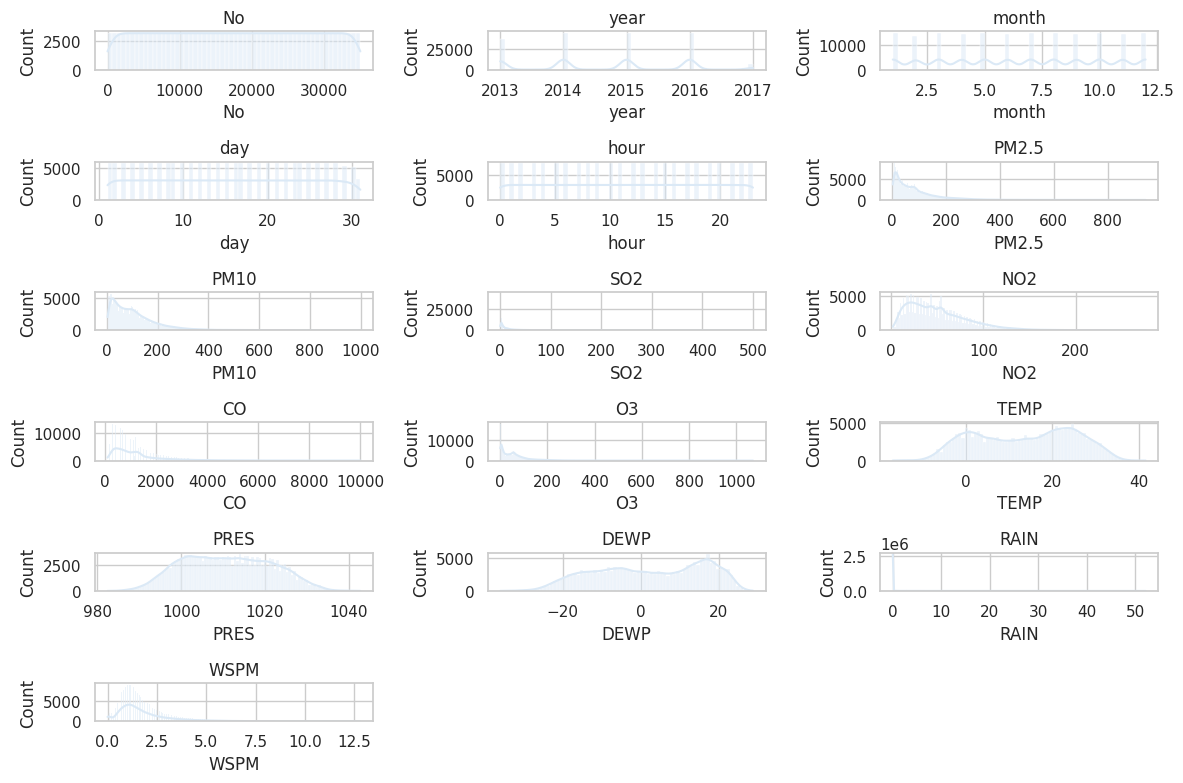

In [201]:
plt.figure(figsize=(12, 8))
num_cols = len(numeric_data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numeric_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Box Plot**

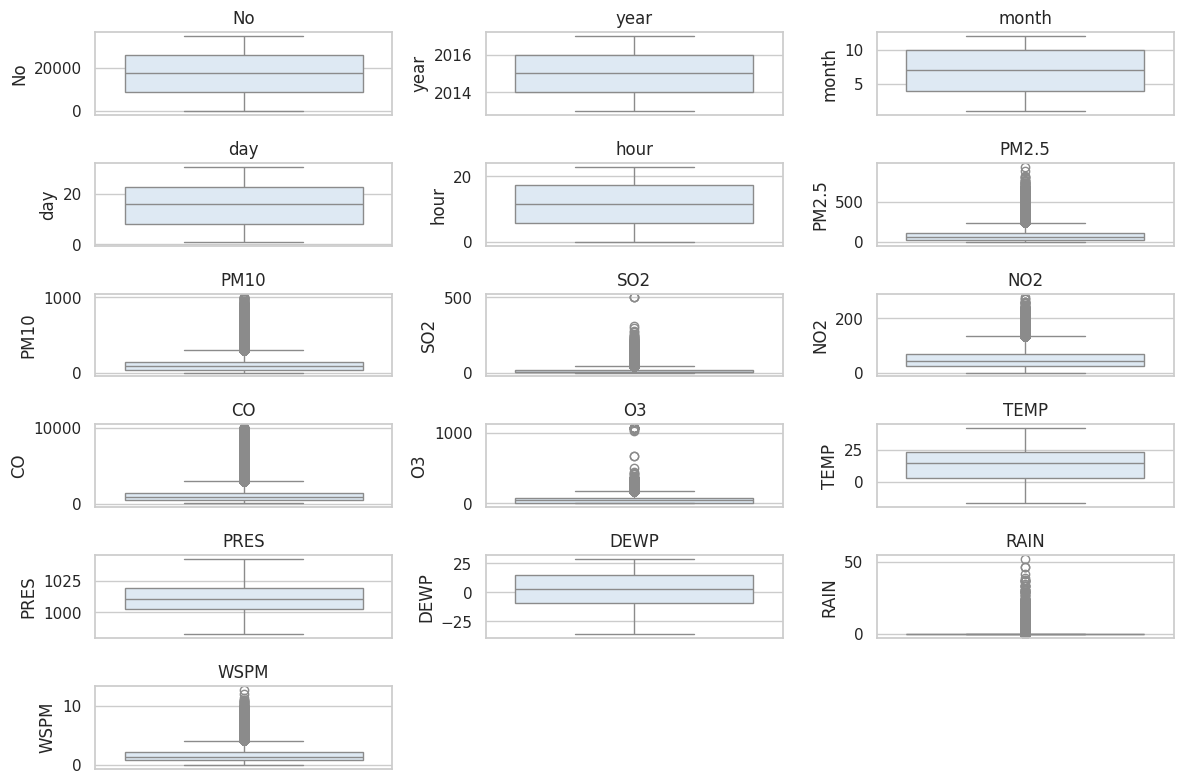

In [202]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numeric_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**KDE Plot**

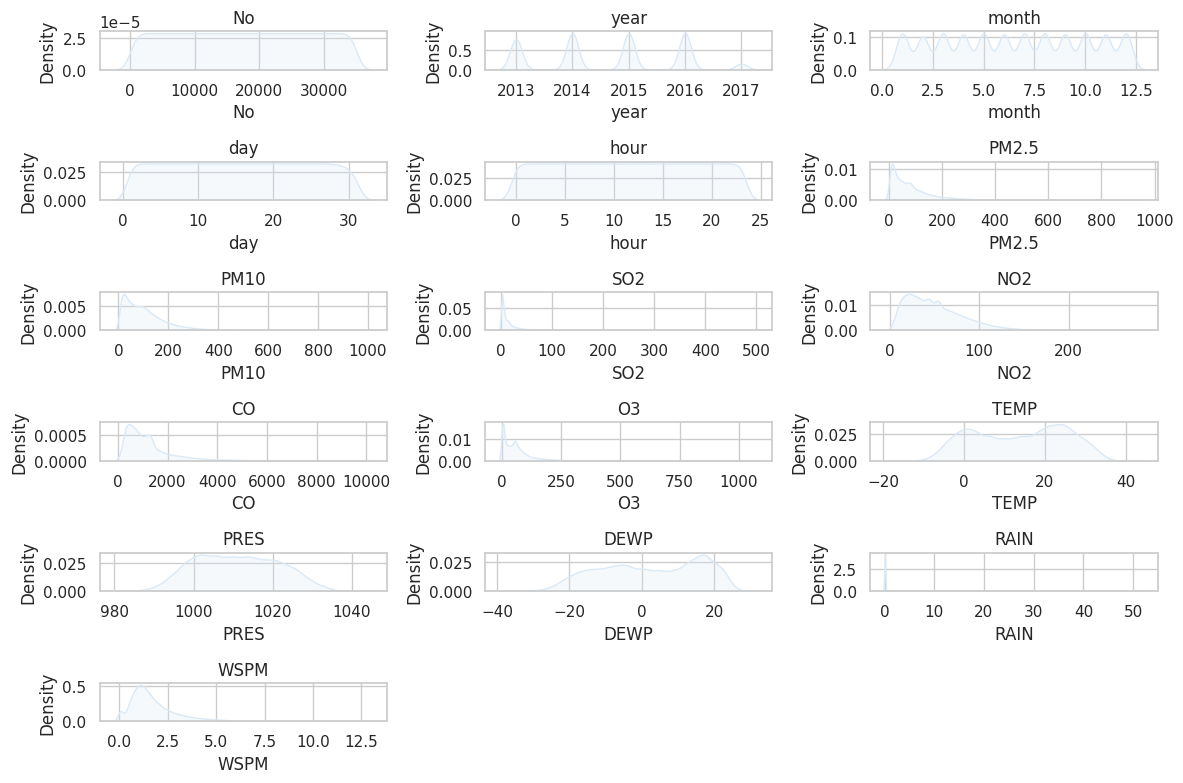

In [203]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.kdeplot(numeric_data[col], fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Pie Chart**

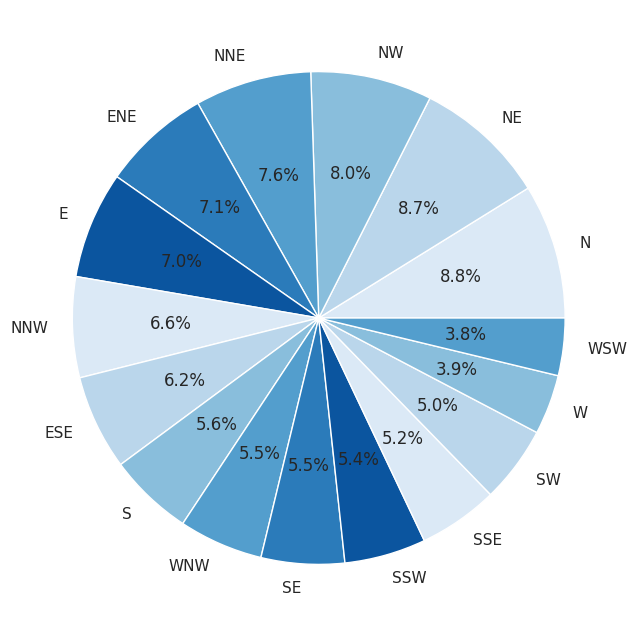

In [204]:
sns.set(style="whitegrid", palette="Blues")
plt.figure(figsize=(8, 8))
categorical_data['wd'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

**Bar Chart**

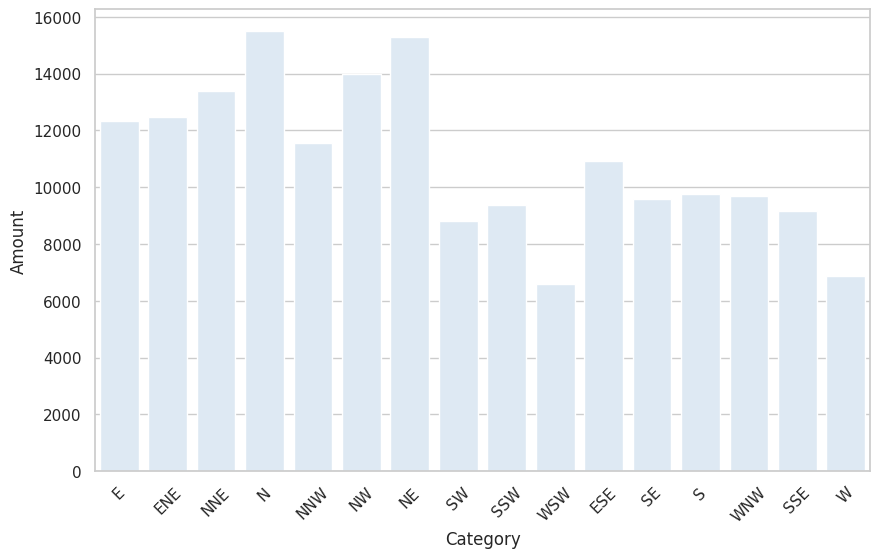

In [205]:
plt.figure(figsize=(10, 6))
sns.countplot(data=categorical_data, x='wd')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

The wind most often blows in the N or north direction

**Correlation** <br>
Correlation is used to measure the relationship between two variables in a dataset.

In [206]:
correlation_matrix = concat_df.corr()
correlation_matrix

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.017584,-0.028677,-0.212822,-0.012261,0.015539,-0.073897,-0.126209,0.168788,-0.093646,0.005921,0.057376
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,-1.937404e-15,-0.018737,-0.023082,-0.156179,-0.024610,0.004524,-0.045674,-0.155654,0.169349,-0.156009,0.001750,0.089588
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,-1.799760e-16,0.005402,-0.022952,-0.216230,0.049973,0.044147,-0.108786,0.131946,-0.020224,0.263251,0.017155,-0.135979
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,2.978755e-17,0.002723,0.025919,-0.002062,0.009339,-0.016044,0.001378,0.014728,0.020878,0.022324,-0.004554,-0.008888
hour,0.000684,-1.937404e-15,-1.799760e-16,2.978755e-17,1.000000e+00,0.016628,0.057792,0.038906,0.006344,-0.025894,0.281039,0.141492,-0.038738,-0.012229,0.012159,0.135017
PM2.5,-0.017584,-1.873676e-02,5.401903e-03,2.722586e-03,1.662842e-02,1.000000,0.875357,0.461620,0.661986,0.761726,-0.144640,-0.130586,0.012580,0.116746,-0.013837,-0.273528
PM10,-0.028677,-2.308205e-02,-2.295197e-02,2.591926e-02,5.779246e-02,0.875357,1.000000,0.431575,0.647494,0.675576,-0.108759,-0.095263,-0.028869,0.070845,-0.026853,-0.188137
SO2,-0.212822,-1.561788e-01,-2.162305e-01,-2.061707e-03,3.890571e-02,0.461620,0.431575,1.000000,0.467411,0.508255,-0.147883,-0.318847,0.213730,-0.269716,-0.040422,-0.102956
NO2,-0.012261,-2.461030e-02,4.997316e-02,9.339231e-03,6.344048e-03,0.661986,0.647494,0.467411,1.000000,0.687715,-0.475151,-0.287137,0.146729,-0.040799,-0.045033,-0.408412
CO,0.015539,4.524378e-03,4.414708e-02,-1.604444e-02,-2.589355e-02,0.761726,0.675576,0.508255,0.687715,1.000000,-0.304073,-0.323956,0.171806,-0.058745,-0.013133,-0.295206


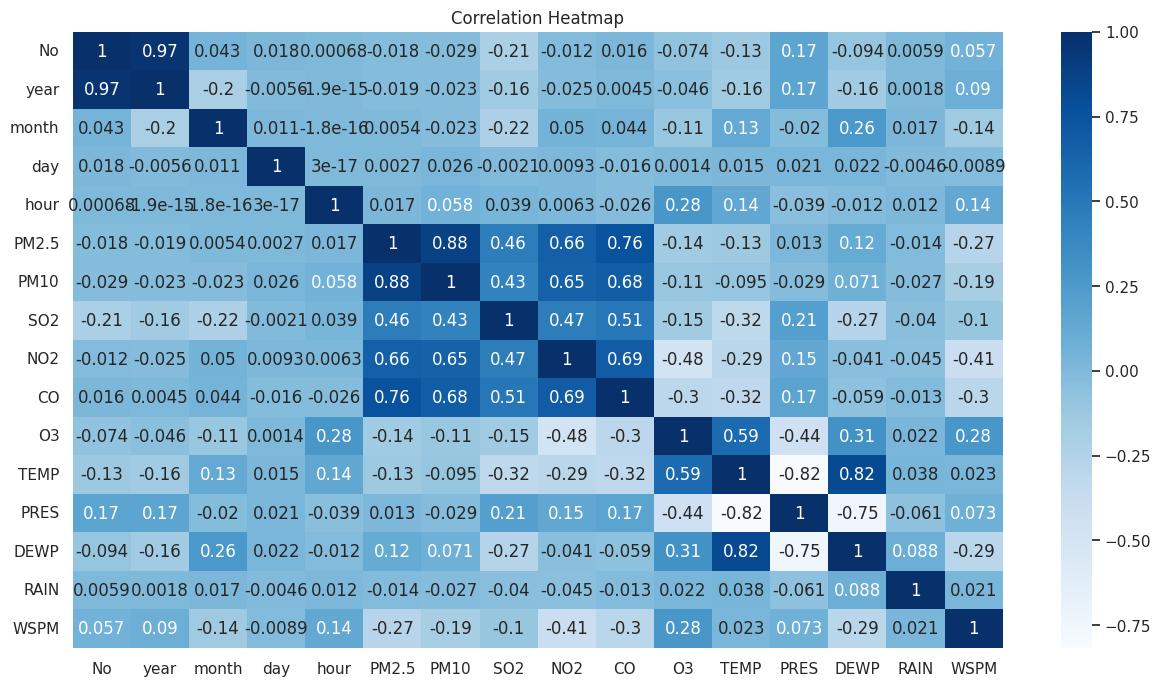

In [207]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

- The diagonal from the top left to the bottom right shows perfect positive correlations (1.00) because it's where each variable intersects with itself
- High positive correlations (dark blue) suggest that as one variable increases, the other variable also tends to increase. For example, PM2.5 and PM10 have a high positive correlation of 0.88, indicating that when PM2.5 levels are high, PM10 levels are also likely to be high
- High negative correlations (dark red) suggest that as one variable increases, the other variable tends to decrease. For example, TEMP and PRES have a high negative correlation of -0.82, indicating that when temperature is high, pressure tends to be lower
- Values close to zero (white) indicate a very weak or no linear relationship between the variables

## **Visualization & Explanatory Analysis**

### **Question 1: What is the pattern of change in air pollution and weather at various stations from year to year?**

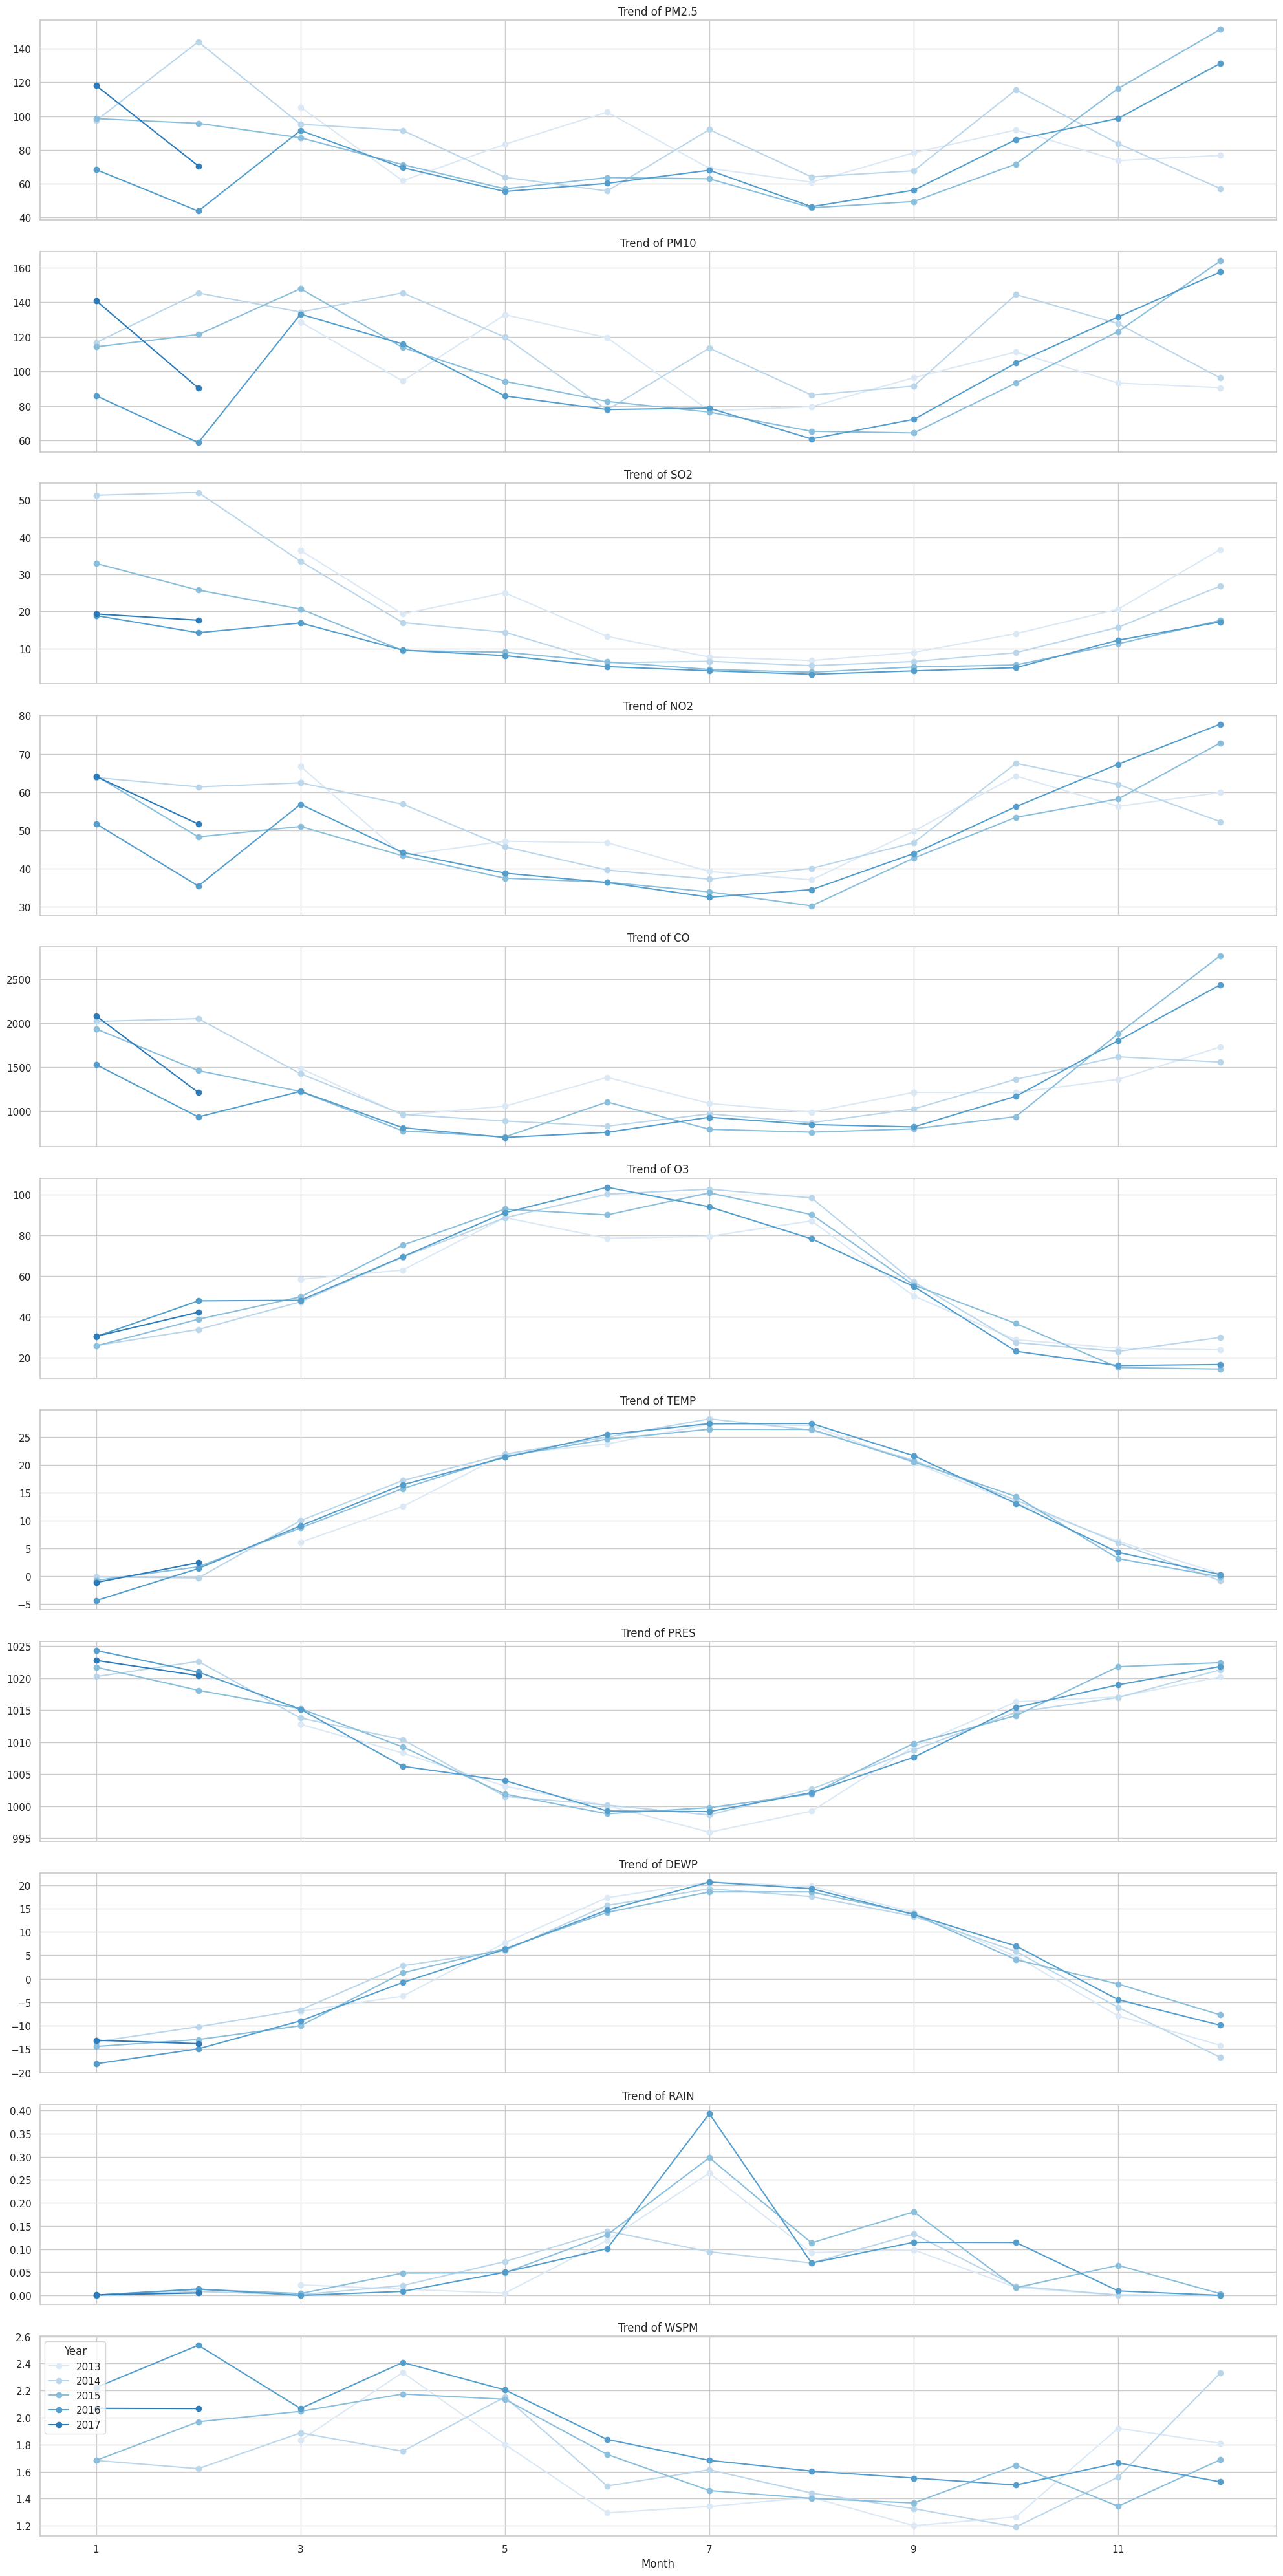

In [208]:
monthly_data = concat_df.groupby([concat_df['date'].dt.year, concat_df['date'].dt.month])['PM2.5'].mean()
monthly_data.index = monthly_data.index.set_levels(monthly_data.index.levels[1].astype(str), level=1)
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(20, 40), sharex=True)
for i, feature in enumerate(features):
    monthly_data = concat_df.groupby([concat_df['date'].dt.year, concat_df['date'].dt.month])[feature].mean()
    monthly_data.index = monthly_data.index.set_levels(monthly_data.index.levels[1].astype(str), level=1)
    monthly_data.unstack(level=0).plot(ax=axs[i], marker='o', legend=False)
    axs[i].set_title('Trend of ' + feature)

plt.xlabel('Month')
axs[-1].legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()

Bivariate analysis is a statistical analysis process involving two variables to understand the relationship or correlation between them. I compared all the variables with time (trend analysis).
- Trend of PM2.5: There seems to be a seasonal pattern with higher levels in the colder months and lower levels in the warmer months
- Trend of PM10: Similar to PM2.5, PM10 levels also show a seasonal pattern with peaks during colder months
- Trend of SO2: Sulfur dioxide levels fluctuate throughout the year without a clear seasonal pattern
- Trend of NO2: Nitrogen dioxide levels show some seasonal variation, with some years indicating higher levels in colder months
- Trend of CO: Carbon monoxide levels are significantly higher in the colder months, indicating a strong seasonal pattern
- Trend of O3: Ozone levels peak during the warmer months, which is typical due to the increased sunlight and photochemical reactions
- Trend of TEMP: This represents the temperature trend, showing higher temperatures in the middle of the year (summer) and lower temperatures at the beginning and end of the year (winter)
- Trend of PRES: This likely represents atmospheric pressure, with some variation throughout the year but no clear seasonal pattern
- Trend of DEWP: This represents the dew point, which tends to be higher during warmer months, indicating more moisture in the air
- Trend of RAIN: Rainfall levels show significant variability month-to-month and year-to-year, with some peaks that could be associated with seasonal weather patterns
- Trend of WSPM: This likely represents wind speed, showing variability throughout the year with no clear seasonal pattern

Winter or colder month in China is from December until March.

### **Question 2: What is the relationship between weather conditions (temperature, air pressure, humidity, rain, wind direction and speed) and air pollution levels?**

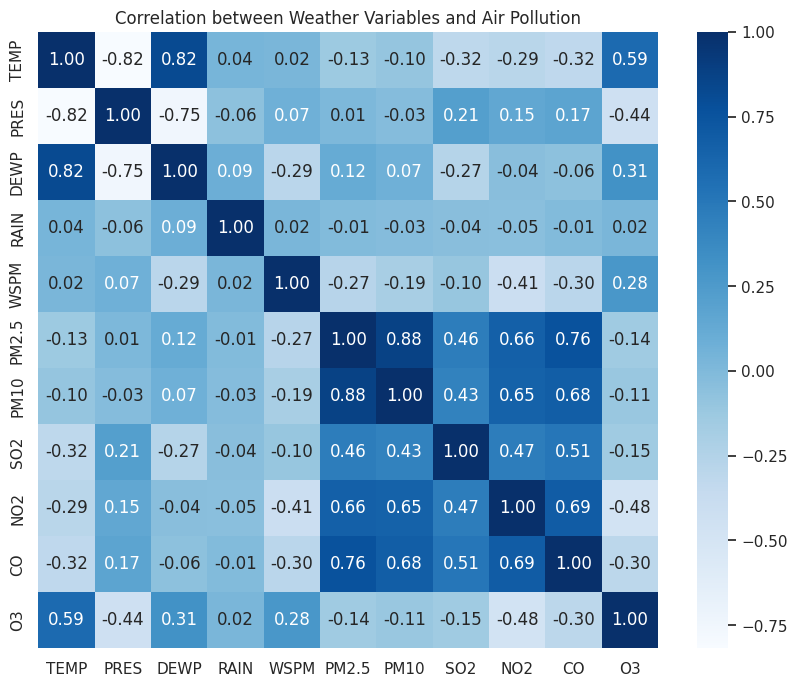

In [209]:
weather_columns = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
pollution_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

weather_pollution_corr = concat_df[weather_columns + pollution_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(weather_pollution_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation between Weather Variables and Air Pollution')
plt.show()

Based on this heatmap, we can see some prominent relationships:
- Almost all correlations between weather conditions and air pollution levels are below 0.5, indicating that the relationship between weather variables and air pollution levels tends to be weak or statistically insignificant.
- Temperature affects O3 by 59%, this shows that air temperature has a fairly significant influence on ozone levels.

Thus, although air temperature has a significant influence on ozone levels, the relationship between weather variables in general and air pollution levels tends to be weak or statistically insignificant. This suggests that factors other than weather conditions may have a greater contribution to air pollution levels, such as human activities, wind patterns, topography and other factors.

## **Question 3: How do the locations associated with air monitoring stations affect the level of air pollution (PM2.5) in that area?**

### **Analysis of Variance (ANOVA)**
ANOVA a statistical method used to compare the means of three or more groups to determine whether there are statistically significant differences between them. In this ANOVA process described, I compared the PM2.5 levels across different stations (Changping, Dongsi, Gucheng, Shunyi, and Tiantan) to determine if there are significant differences in pollution levels among these locations. The PM2.5 levels at each station were treated as separate groups, and the ANOVA test evaluated whether the mean PM2.5 levels vary significantly between these stations. If the p-value is less than 0.05, it suggests that there is a significant difference in PM2.5 levels among the stations.

In [210]:
group1 = concat_df[concat_df['station'] == 'Changping']['PM2.5']
group2 = concat_df[concat_df['station'] == 'Dongsi']['PM2.5']
group3 = concat_df[concat_df['station'] == 'Gucheng']['PM2.5']
group4 = concat_df[concat_df['station'] == 'Shunyi']['PM2.5']
group5 = concat_df[concat_df['station'] == 'Tiantan']['PM2.5']

f_statistic, p_value = f_oneway(group1, group2, group3, group4, group5)

if p_value < 0.05:
    print("There is a significant difference between at least one pair of groups.")
else:
    print("There is no significant difference between the tested groups.")

There is a significant difference between at least one pair of groups.


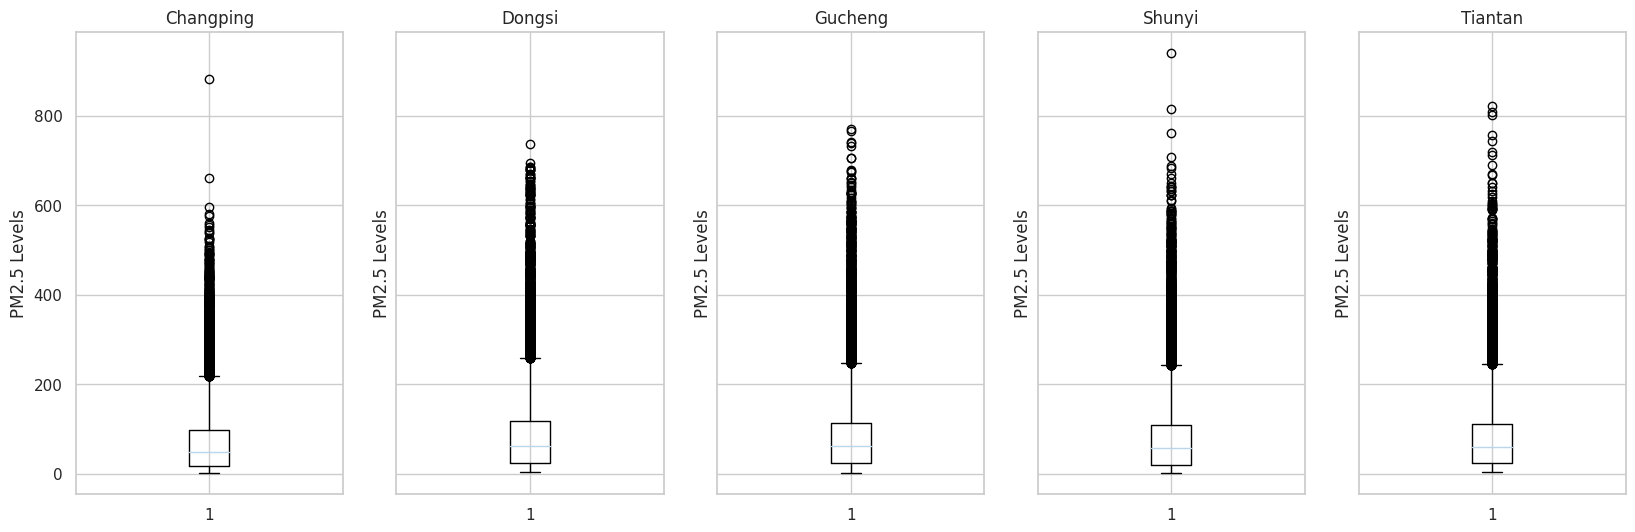

In [211]:
data = [group1, group2, group3, group4, group5]
labels = ['Changping', 'Dongsi', 'Gucheng', 'Shunyi', 'Tiantan']

fig, axs = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
for i, ax in enumerate(axs):
    ax.boxplot(data[i])
    ax.set_title(labels[i])
    ax.set_ylabel('PM2.5 Levels')

plt.show()

The result "There is a significant difference between at least one pair of groups" indicates that there is a statistically significant difference in the mean levels of PM2.5 among the air monitoring stations (Changping, Dongsi, Gucheng, Shunyi, and Tiantan). In other words, at least one pair of these stations has significantly different average PM2.5 levels. This suggests that the location or other factors associated with these stations might influence the levels of PM2.5 pollution.

## **Conclusion**

- Bivariate analysis reveals distinct seasonal patterns in air pollutant levels, with higher concentrations observed during colder months. Temperature, carbon monoxide, and ozone exhibit strong seasonal trends, while sulfur dioxide, nitrogen dioxide, and wind speed show less consistent variations throughout the year.
-  Although air temperature has a significant influence on ozone levels, the relationship between weather variables in general and air pollution levels tends to be weak or statistically insignificant. This suggests that factors other than weather conditions may have a greater contribution to air pollution levels, such as human activities, wind patterns, topography and other factors.
- Based on the ANOVA analysis results, there is a significant difference in air pollution levels (PM2.5) between at least one pair of different air monitoring station locations. This means that some station locations have significantly different air pollution levels compared to other station locations.